In [4]:
import h5py
import numpy as np
import pandas as pd
import os
import re
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
def tryint(s):
    try:
        return int(s)
    except:
        return s
     
def alphanum_key(s):
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    l.sort(key=alphanum_key)
    return l

In [63]:
class nbody_snapshot:
    def __init__(self, path):
        self.file = self.__read_snapshot__(path)
        self.TTOT = int(path.split('/')[-1].split('_')[1].split('.')[0])
        self.steps = len(self.file)
        self.current_step = 0
        self.single_star_data, self.time = self.__get_single_star_data__()
        self.center = (self.single_star_data.X1.mean(),
                       self.single_star_data.X2.mean(),
                       self.single_star_data.X3.mean())
    
    @staticmethod
    def __read_snapshot__(path):
        f = h5py.File(path)
        return f
    
    def __get_single_star_data__(self):
        rd = self.file[f'Step#{self.current_step}']
        time = list(rd.attrs.values())[0]
        keys_i = ['NAM', 'X1', 'X2', 'X3', 'V1', 'V2', 'V3', 'M', 'L', 'MC', 'RC', 'RS', 'POT', 'TE']
        de = dict()
        for key in keys_i:
            de[key] = rd[key]
        df = pd.DataFrame(data=de)
        return df, time
    
    def reload_at_step(self, step):
        if step >= len(self.file):
            raise KeyError(f'file does not have Step#{step}')
        self.current_step = step
        self.single_star_data, self.time = self.__get_single_star_data__()

    def save_single_star_data(self, filename, sep=','):
        self.single_star_data.to_csv(filename, sep=sep, index=False)
        
    def xget_steps(self, start=0, stop=None):
        if not stop:
            stop = len(self.file)
        for step in range(start, stop):
            self.reload_at_step(step)
            yield self.single_star_data, self.time
        
    def __repr__(self):
        out = list()
        last_step = (sort_nicely(list(self.file)))[-1]
        out.append(f'|---------------------------')
        out.append(f"| Snapshot     | {self.TTOT}")
        out.append(f"| N            | {len(self.single_star_data)}")
        out.append(f"| Centered at  | {self.center}")
        out.append(f"| Stat Time    | {list(self.file['Step#0'].attrs.values())[0]}")
        out.append(f"| Stop Time    | {list(self.file[last_step].attrs.values())[0]}")
        out.append(f"| Subsnaps     | {len(self.file)}")
        out.append(f'|---------------------------')
        return '\n'.join(out)

In [54]:
#TODO: get the follow_ID working for xget_snaps
class snapshot_set:
    def __init__(self, basepath, subsnap=False):
        h5files = [x for x in os.listdir(basepath) if '.h5part' in x]
        h5files = sort_nicely(h5files)
        self.snapshots = [nbody_snapshot(f"{basepath}/{x}") for x in h5files]
        self.subsnap = subsnap

    def follow_ID(self, ID):
        times = list()
        if not self.subsnap:
            df = self.snapshots[0].single_star_data[self.snapshots[0].single_star_data['NAM'] == ID]
        else:
            df
        times.append(self.snapshots[0].TTOT)
        for snapshot in self.snapshots[1:]:
            if not self.subsnap:
                if len(snapshot.single_star_data[snapshot.single_star_data['NAM'] == ID]) != 0:
                    tdf = snapshot.single_star_data[snapshot.single_star_data['NAM'] == ID]
                    times.append(snapshot.time)
                    df = df.append(tdf)
            else:
                for data, time in self.snapshot.xget_snaps(start=1):
                    tdf = data[data['NAM'] == ID]
                    times.append(time)
                    df = df.append(tdf)
        df['Time'] = times
        return df.reset_index(drop=True)
    
    def dump_set(self, path, name, sep=','):
        if path[-1] == '/':
            path = path[:-1]
        if not os.path.exists(path):
            os.mkdir(path)
        filenames = [f"{path}/{name}_{snap.TTOT}.csv" for snap in self.snapshots]
        for snap, filename in zip(self.snapshots, filenames):
            snap.save_single_star_data(filename, sep=sep)

SyntaxError: invalid syntax (<ipython-input-54-ade4690614ab>, line 23)

In [64]:
PATH = "../../../simulations/runTests/MultiBinaryTest/Binary0-0/Binary0-0/snap.40_2.h5part"
snap = nbody_snapshot(PATH)
snap.reload_at_step(5)

In [50]:
f = h5py.File(PATH)
list(f['Step#4'].attrs.values())

[2.15625, 492]

In [21]:
PATH = "../../../simulations/runTests/MultiBinaryTest/Binary0-0/Binary0-0"
snapset = snapshot_set(PATH)

In [22]:
snapset.dump_set('/Users/tboudreaux/SAOSummer2018/code/General/nbodyPythonInterface/InterfaceTestData', 'TestDump')

In [6]:
NAM1 = snapset.follow_ID(1)

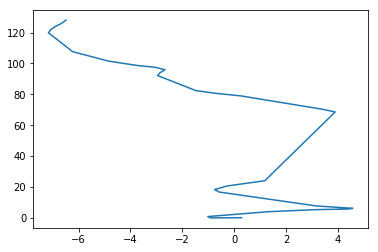

In [305]:
plt.plot(NAM1['X1'], NAM1['X2'])

In [307]:
PATH = "../../../simulations/runTests/ExternalPotentialTest2/N1k_R3_K_xtern"
snapset = snapshot_set(PATH)

In [340]:
NAM1 = snapset.follow_ID(2)

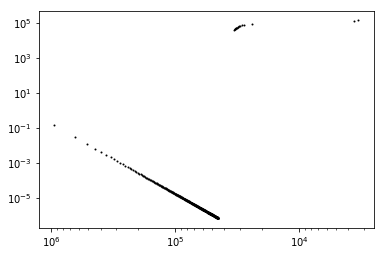

In [346]:
plt.loglog(NAM1['TE'], NAM1['L'], 'ko', markersize=1)
plt.gca().invert_xaxis()

In [24]:
pwd

'/Users/tboudreaux/Documents/SAOSummer2018REU/code/General/nbodyPythonInterface'

In [65]:
for s, t in snap.xget_steps():
    print(t)

2.03125
2.0625
2.09375
2.125
2.15625
2.1875
2.21875
2.25
2.28125
2.3125
2.34375
2.375
2.40625
2.4375
2.46875
2.5
2.53125
2.5625
2.59375
2.625
2.65625
2.6875
2.71875
2.75
2.78125
2.8125
2.84375
2.875
2.90625
2.9375
2.96875
3.0
